# --------------------------- RANDOM FOREST ------------------------------

Dataset Description:

Use the Glass dataset and apply the Random forest model.


1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

***1.*** ***Exploratory Data Analysis (EDA)***:

* Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

***2: Data Visualization***:

* Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
* Analyze any patterns or correlations observed in the data.

In [255]:
# ----------- *** STEP 1: DATA EXPLORATION *** ---------------- #

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression

In [256]:
# ------------ *** LOADING DATASET *** ------------- #

df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [258]:
# Statistical Summary

df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [259]:
# ------------- FINDING MISSING VALUES & OUTLIERS ----------------- #

df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


### There seems to be no missing values in the dataset

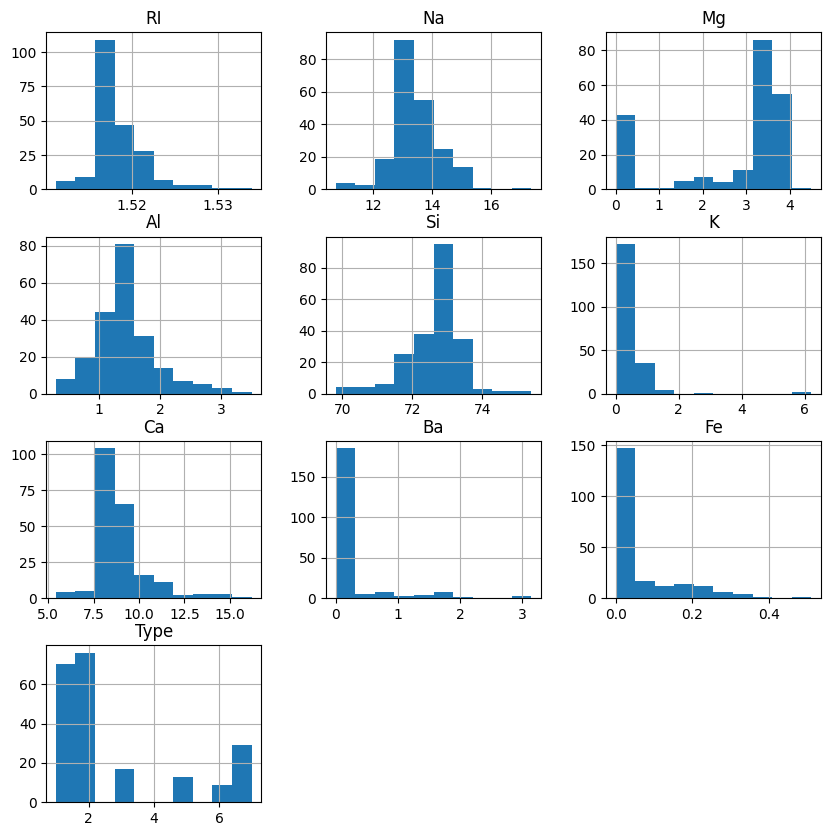

In [260]:
# Hist Plot

df.hist(bins=10,figsize=(10,10))
plt.show()

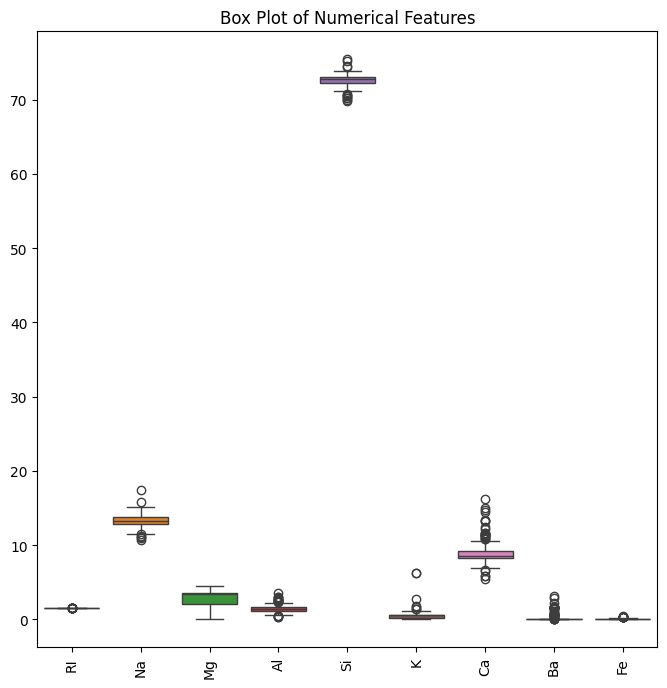

In [261]:
# Box Plot

plt.figure(figsize=(8,8))
sns.boxplot(data=df.drop(columns=['Type']))
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

**Histograms**:

These plots display the distribution of each numerical feature in the dataset. They help to understand the frequency of different values within each column. For the Glass dataset, we can observe the general shape of the data for each chemical component (e.g., 'RI', 'Na', 'Mg') and the 'Type' column. We can see if distributions are symmetrical, skewed, or multimodal.

**Box Plots**:

Box plots provide a summary of the distribution of each numerical feature, highlighting the median, quartiles (25th and 75th percentiles), and potential outliers. For Glass dataset, these plots are particularly useful for:

* Identifying central tendency and spread: The box shows the interquartile range (IQR), and the line inside the box is the median.
* Detecting outliers: Individual points outside the 'whiskers' of the box plot indicate potential outliers, which are values significantly different from the majority of the data. Many features in dataset, such as 'Ba', 'Fe', 'K', and 'Ca', show several outliers.

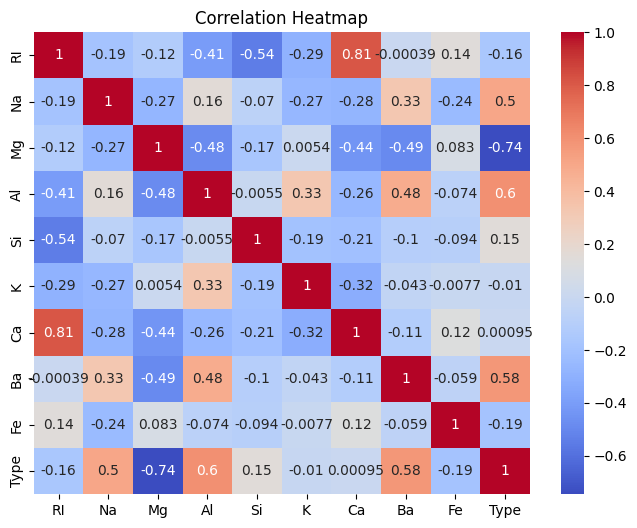

In [262]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation Heatmap:

This plot visualizes the pairwise correlation coefficients between all numerical features in dataset.

The color intensity and hue indicate the strength and direction (positive or negative) of the relationship:
* Positive Correlation: As one variable increases, the other tends to increase. For example, in Glass dataset, RI and Ca show a strong positive correlation, suggesting that glasses with higher refractive index tend to have higher calcium content.
* Negative Correlation: As one variable increases, the other tends to decrease. For example, Si and Ca appear to have a negative correlation.
* No Correlation: The variables do not have a linear relationship.

Key observations from heatmap would typically include:

* Strongest positive/negative correlations: Identify the pairs of features with the darkest red or blue squares.
* Features highly correlated with the target variable (Type): This can give insights into which chemical components are most indicative of the glass type.
* Multicollinearity: High correlations between independent features could indicate multicollinearity, which might be a consideration for some machine learning models.

***3: Data Preprocessing***

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [263]:
# there are no missing values in the data set

# Since all the columns are numerical columns hence one hot encoding will not be used in this case and we can proceed with Standard Scaler preprocessing

In [264]:
# Data Preprocessing

X=df.drop(columns=['Type'])
y=df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
# Standard Scaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [266]:
# Decision Tree Classifier

dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [267]:
y_pred_test_dt=dt.predict(X_test)
y_pred_train_dt=dt.predict(X_train)

training_accuracy=accuracy_score(y_train,y_pred_train_dt)
testing_accuracy=accuracy_score(y_test,y_pred_test_dt)
accuracy=accuracy_score(y_test,y_pred_test_dt)
precision=precision_score(y_test,y_pred_test_dt, average='weighted')
recall=recall_score(y_test,y_pred_test_dt,average='weighted')
f1=f1_score(y_test,y_pred_test_dt,average='weighted')

print(f'DT-Training Accuracy: {training_accuracy:.2f}')
print(f'DT-Testing Accuracy: {testing_accuracy:.2f}')
print(f'DT-Precision: {precision:.2f}')
print(f'DT-Recall: {recall:.2f}')
print(f'DT-F1_score: {f1:.2f}')

DT-Training Accuracy: 1.00
DT-Testing Accuracy: 0.72
DT-Precision: 0.73
DT-Recall: 0.72
DT-F1_score: 0.71


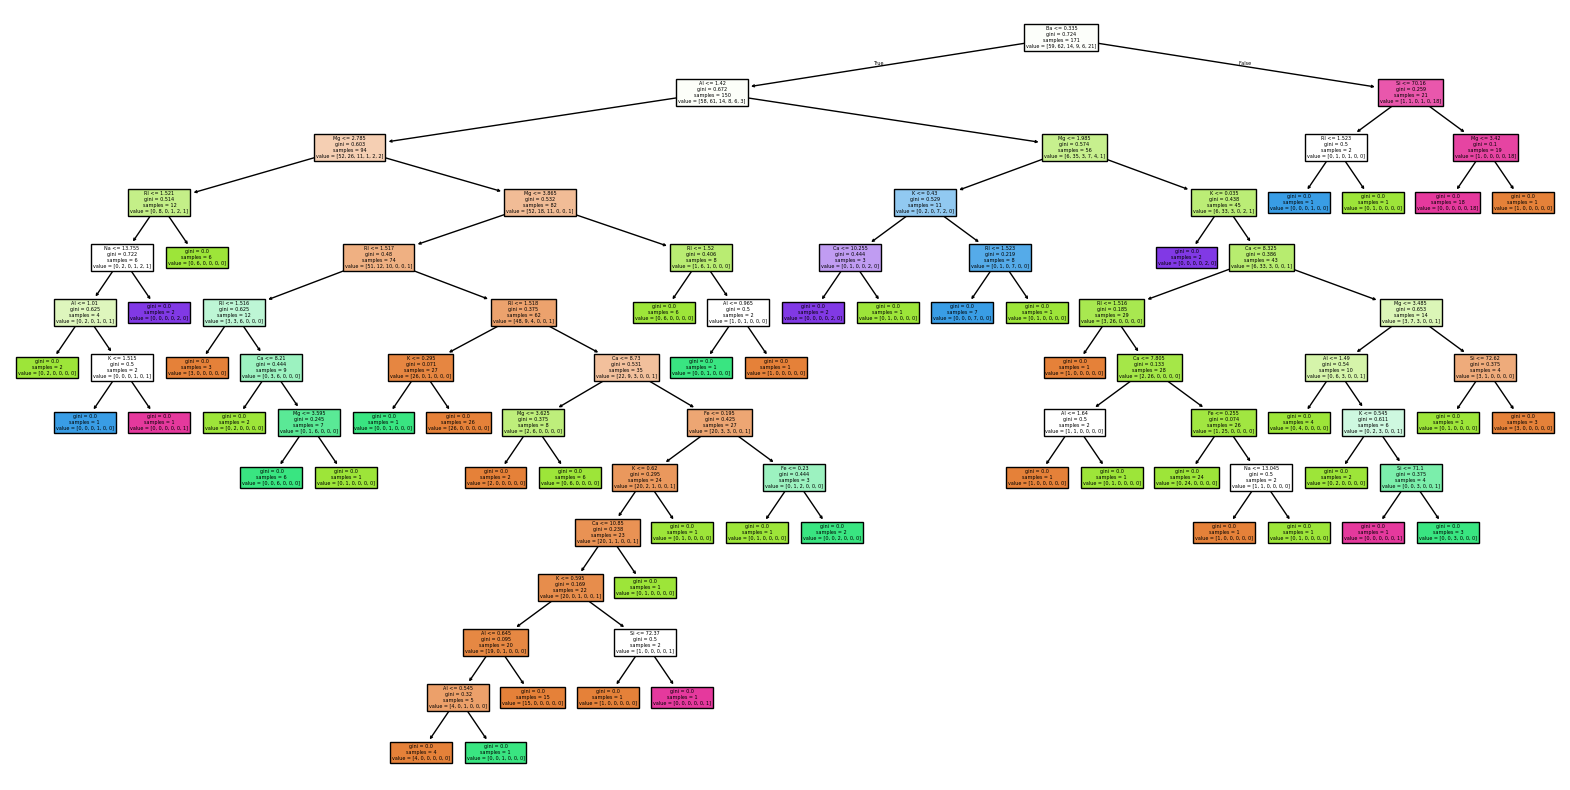

In [268]:
plt.figure(figsize=(20,10))
plot_tree(dt,filled=True,feature_names=X.columns)
plt.show()

In [269]:
n_nodes=dt.tree_.node_count
depth=dt.tree_.max_depth

print(f'Number of Nodes: {n_nodes}')
print(f'Depth of the tree: {depth}')

Number of Nodes: 91
Depth of the tree: 13


In [270]:
# Handeling imbalance using unsampling

df_bal=df.copy()
major_class=df_bal['Type'].value_counts().idxmax()
dfs=[]

for cls in df_bal['Type'].unique():
  subset=df_bal[df_bal['Type']==cls]
  if len(subset)<df_bal['Type'].value_counts()[major_class]:
    subset=resample(subset,replace=True, n_samples=df_bal['Type'].value_counts()[major_class],random_state=42)
  dfs.append(subset)

df_bal=pd.concat(dfs)
X_bal=df_bal.drop(columns=['Type'])
y_bal=df_bal['Type']

X_bal_scaled=scaler.fit_transform(X_bal)
X_bal_scaled

array([[ 0.37944903, -0.44001733,  0.79501542, ..., -0.00504071,
        -0.41997653,  0.62815584],
       [-0.19112932, -1.02918899,  0.9596594 , ..., -0.44416934,
        -0.41997653, -0.42422548],
       [ 0.30593894, -0.04057891,  0.97865678, ..., -0.26577334,
        -0.41997653, -0.42422548],
       ...,
       [-0.91572882,  0.22904202, -1.31369394, ...,  0.18021668,
         1.12184367, -0.32855445],
       [-0.37315431,  0.58853659, -1.31369394, ..., -0.36183273,
         2.75883795, -0.42422548],
       [-0.68119661,  0.55857871, -1.31369394, ..., -0.07365456,
         0.34141616,  0.43681378]])

In [271]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X_bal_scaled, y_bal, test_size=0.2, random_state=42)

***4: Random Forest Model Implementation***
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [272]:
# Random Forest Classifier

rf_model=RandomForestClassifier(n_estimators=100,random_state=42,max_samples=0.6,max_features=0.7,max_depth=10)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=0.7, max_samples=0.6,
                       random_state=42)

In [273]:
y_pred_train_rf=rf_model.predict(X_train)
y_pred_test_rf=rf_model.predict(X_test)

training_accuracy=accuracy_score(y_train,y_pred_train_rf)
testing_accuracy=accuracy_score(y_test,y_pred_test_rf)
precision=precision_score(y_test,y_pred_test_rf, average='weighted')
recall=recall_score(y_test,y_pred_test_rf,average='weighted')
f1=f1_score(y_test,y_pred_test_rf,average='weighted')

print(f'RF-Training Accuracy: {training_accuracy:.2f}')
print(f'RF-Testing Accuracy: {testing_accuracy:.2f}')
print(f'RF-Precision: {precision:.2f}')
print(f'RF-Recall: {recall:.2f}')
print(f'RF-F1_score: {f1:.2f}')

RF-Training Accuracy: 0.99
RF-Testing Accuracy: 0.93
RF-Precision: 0.94
RF-Recall: 0.93
RF-F1_score: 0.94


In [274]:
# Grid Search CV

param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'max_samples':[0.6,0.7,0.8],
    'max_features':[0.6,0.7,0.8]
}

rf_model=RandomForestClassifier(random_state=42)

grid_search=GridSearchCV(estimator=rf_model,param_grid=param_grid,scoring='accuracy')

grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
best_rf_model=grid_search.best_estimator_
best_score=grid_search.best_score_

print(f'RF-Best Hyper-Parameters: {best_params}')
print(f'RF-Best Score: {best_score:.2f}')
print(f'RF-Best Model: {best_rf_model}')

y_pred_test_best=best_rf_model.predict(X_test)

testing_accuracy_best=accuracy_score(y_test,y_pred_test_best)
print(f'RF-Testing Accuracy: {testing_accuracy_best:.2f}')

RF-Best Hyper-Parameters: {'max_depth': None, 'max_features': 0.7, 'max_samples': 0.8, 'n_estimators': 100}
RF-Best Score: 0.95
RF-Best Model: RandomForestClassifier(max_features=0.7, max_samples=0.8, random_state=42)
RF-Testing Accuracy: 0.95


***5: Bagging and Boosting Methods***
* Apply the Bagging and Boosting methods and compare the results.

In [275]:
# BAGGING CLASSIFIER

bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),n_estimators=100,max_samples=0.8,max_features=0.8,random_state=42)
bag_model.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.8,
                  max_samples=0.8, n_estimators=100, random_state=42)

In [276]:
y_pred_train_bag=bag_model.predict(X_train)
y_pred_test_bag=bag_model.predict(X_test)

training_accuracy=accuracy_score(y_train,y_pred_train_bag)
testing_accuracy=accuracy_score(y_test,y_pred_test_bag)
precision=precision_score(y_test,y_pred_test_bag, average='weighted')
recall=recall_score(y_test,y_pred_test_bag,average='weighted')
f1=f1_score(y_test,y_pred_test_bag,average='weighted')

print(f'Bag-Training Accuracy: {training_accuracy:.2f}')
print(f'Bag-Testing Accuracy: {testing_accuracy:.2f}')
print(f'Bag-Precision: {precision:.2f}')
print(f'Bag-Recall: {recall:.2f}')
print(f'Bag-F1_score: {f1:.2f}')

Bag-Training Accuracy: 1.00
Bag-Testing Accuracy: 0.93
Bag-Precision: 0.94
Bag-Recall: 0.93
Bag-F1_score: 0.94


In [277]:
param_grid = {
    'n_estimators': [50, 100, 200]
}

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'), random_state=42,n_estimators=100,max_samples=0.8,max_features=0.8)

grid_search = GridSearchCV(estimator=bag_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params=grid_search.best_params_
best_bag_model=grid_search.best_estimator_
best_score=grid_search.best_score_

print(f'Bag-Best Hyper-Parameters: {best_params}')
print(f'Bag-Best Score: {best_score:.2f}')
print(f'Bag-Best Model: {best_bag_model}')

y_pred_test_best=best_bag_model.predict(X_test)

testing_accuracy_best=accuracy_score(y_test,y_pred_test_best)
print(f'Bag-Testing Accuracy: {testing_accuracy_best:.2f}')

Bag-Best Hyper-Parameters: {'n_estimators': 200}
Bag-Best Score: 0.94
Bag-Best Model: BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.8,
                  max_samples=0.8, n_estimators=200, random_state=42)
Bag-Testing Accuracy: 0.93


In [278]:
# BOOSTING CLASSIFIER

# Option 1 - Gradient Boosting Classifier

gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [279]:
y_pred_train_gb=gb_model.predict(X_train)
y_pred_test_gb=gb_model.predict(X_test)

training_accuracy=accuracy_score(y_train,y_pred_train_gb)
testing_accuracy=accuracy_score(y_test,y_pred_test_gb)
precision=precision_score(y_test,y_pred_test_gb, average='weighted')
recall=recall_score(y_test,y_pred_test_gb,average='weighted')
f1=f1_score(y_test,y_pred_test_gb,average='weighted')

print(f'GB-Training Accuracy: {training_accuracy:.2f}')
print(f'GB-Testing Accuracy: {testing_accuracy:.2f}')
print(f'GB-Precision: {precision:.2f}')
print(f'GB-Recall: {recall:.2f}')
print(f'GB-F1_score: {f1:.2f}')


GB-Training Accuracy: 1.00
GB-Testing Accuracy: 0.95
GB-Precision: 0.95
GB-Recall: 0.95
GB-F1_score: 0.95


In [280]:
# Grid Search CV

param_grid={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,0.2],
}

gb_model=GradientBoostingClassifier(random_state=42)

grid_search=GridSearchCV(estimator=gb_model,param_grid=param_grid,scoring='accuracy')

grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
best_gb_model=grid_search.best_estimator_
best_score=grid_search.best_score_

print(f'GB-Best Hyper-Parameters: {best_params}')
print(f'GB-Best Score: {best_score:.2f}')
print(f'GB-Best Model: {best_gb_model}')

y_pred_test_best=best_gb_model.predict(X_test)

testing_accuracy_best=accuracy_score(y_test,y_pred_test_best)
print(f'GB-Testing Accuracy: {testing_accuracy_best:.2f}')

GB-Best Hyper-Parameters: {'learning_rate': 0.2, 'n_estimators': 50}
GB-Best Score: 0.94
GB-Best Model: GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, random_state=42)
GB-Testing Accuracy: 0.93


In [281]:
# Option 2 - Adaboost Classifier

ada_model=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [282]:
y_pred_train_ada=ada_model.predict(X_train)
y_pred_test_ada=ada_model.predict(X_test)

training_accuracy=accuracy_score(y_train,y_pred_train_ada)
testing_accuracy=accuracy_score(y_test,y_pred_test_ada)
precision=precision_score(y_test,y_pred_test_ada, average='weighted')
recall=recall_score(y_test,y_pred_test_ada,average='weighted')
f1=f1_score(y_test,y_pred_test_ada,average='weighted')

print(f'ADA-Training Accuracy: {training_accuracy:.2f}')
print(f'ADA-Testing Accuracy: {testing_accuracy:.2f}')
print(f'ADA-Precision: {precision:.2f}')
print(f'ADA-Recall: {recall:.2f}')
print(f'ADA-F1_score: {f1:.2f}')

ADA-Training Accuracy: 0.54
ADA-Testing Accuracy: 0.39
ADA-Precision: 0.22
ADA-Recall: 0.39
ADA-F1_score: 0.25


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [283]:
lr=LogisticRegression(max_iter=500)

dt=DecisionTreeClassifier()

In [284]:
# Grid Search CV

param_grid={
    'estimator':[lr,dt],
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,0.2],
}

ada_model=AdaBoostClassifier(random_state=42)

grid_search=GridSearchCV(estimator=ada_model,param_grid=param_grid,scoring='accuracy')

grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
best_ada_model=grid_search.best_estimator_
best_score=grid_search.best_score_

print(f'AB-Best Hyper-Parameters: {best_params}')
print(f'AB-Best Score: {best_score:.2f}')
print(f'AB-Best Model: {best_ada_model}')

y_pred_test_best=best_ada_model.predict(X_test)

testing_accuracy_best=accuracy_score(y_test,y_pred_test_best)
print(f'AB-Testing Accuracy: {testing_accuracy_best:.2f}')

AB-Best Hyper-Parameters: {'estimator': DecisionTreeClassifier(), 'learning_rate': 0.01, 'n_estimators': 50}
AB-Best Score: 0.92
AB-Best Model: AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   random_state=42)
AB-Testing Accuracy: 0.91


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

### Ans1:

**Bagging:**

It trains multiple models independently on different random subsets of the dataset. Each subset is created using bootstrap sampling (random sampling with replacement).

Goal:

* Reduce variance
* Avoid overfitting
* Build strong stable models

Example Algorithms:

* Bagging Classifier
* Random Forest (Bagging + random feature selection)

Use Bagging when:

* You want to reduce overfitting
* You want stable models
* You have high-variance algorithms (e.g., decision trees)


**Boosting:**

It trains models sequentially, where each new model tries to fix errors made by the previous one. The algorithm focuses more on the misclassified data points.

Goal:

* Reduce bias
* Create a strong model by improving step-by-step
* Convert weak learners to strong learner

Example Algorithms:

* AdaBoost
* Gradient Boosting
* XGBoost
* LightGBM
* CatBoost

Use Boosting when:

* You want the highest accuracy
* You have weak models you want to strengthen
* You want top performance even on complex datasets

### Ans2:

Handling imbalanced data is a very important step in machine learning, especially for classification problems where one class has much fewer samples than others.

When one class has very few samples (minority class), machine learning models tend to:

* Predict the majority class more often

* Ignore minority class patterns

* Show high accuracy but poor recall for minority class

* Fail in real-world cases (fraud detection, medical diagnosis, etc.)

Imbalance handling strategies fall into three main categories:

* Resampling Techniques (Modify the dataset)
  * Oversampling
    * Random Oversampling
    * SMOTE (Synthetic Minority Over-sampling Technique)
  * Undersampling
    * Random Undersampling
  * Hybrid Methods

* Algorithm-Level Methods
  * Use class_weight = "balanced"

* Evaluation Methods
  * Precision
  * Recall
  * F1-score
  * Confusion matrix
  * ROC-AUC

* Which Method Is Best?

  * Small Datasets - SMOTE
  * Large Datasets - Undersampling or Hybrid methods
  * Tree-based models - class_weight is usually enough
  * High class imbalance - SMOTE + class_weight
